Loading dataset...

Dataset Loaded: 1140 images, 5 unique individuals.


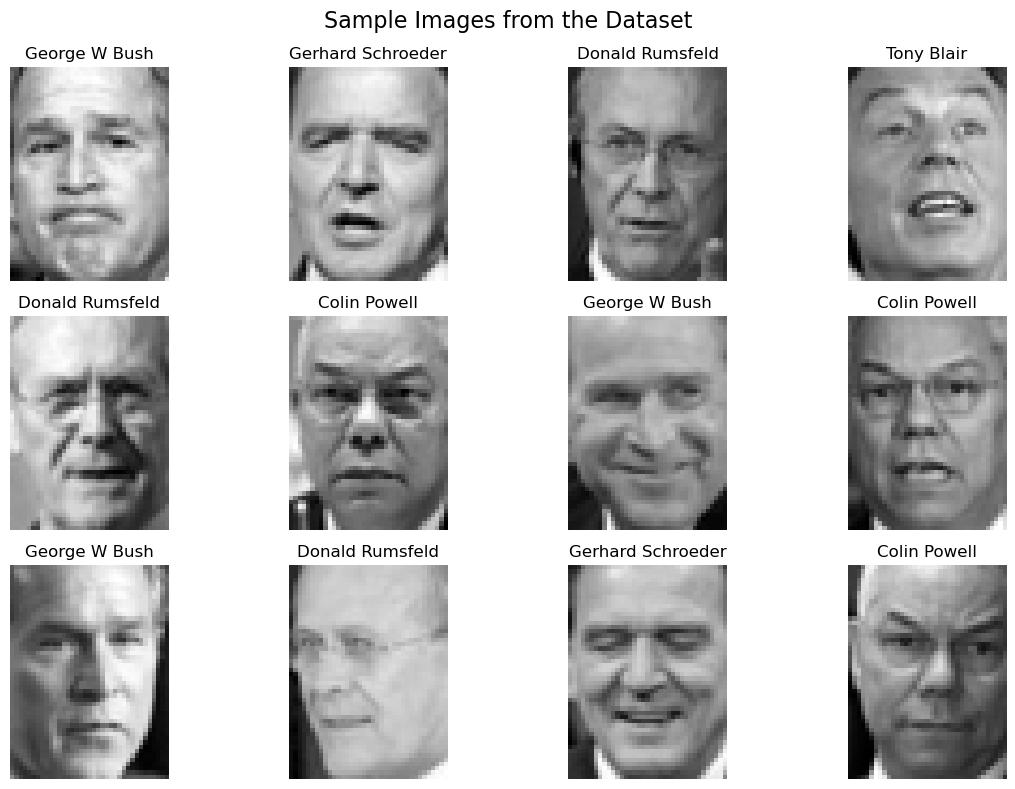

Splitting dataset...
Applying PCA...
Data Preprocessing Complete. PCA reduced feature dimensions to: 150


In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA

# Load the Labeled Faces in the Wild dataset
print("Loading dataset...")
lfw_dataset = fetch_lfw_people(min_faces_per_person=100, resize=0.4)
print()
# Dataset details
images = lfw_dataset.images  # Grayscale images of faces
labels = lfw_dataset.target  # Numeric labels for the faces
target_names = lfw_dataset.target_names  # Names of individuals

print(f"Dataset Loaded: {len(images)} images, {len(target_names)} unique individuals.")

# Visualize a few images from the dataset
plt.figure(figsize=(12, 8))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.title(target_names[labels[i]])
    plt.axis("off")
plt.suptitle("Sample Images from the Dataset", fontsize=16)
plt.tight_layout()
plt.show()

# Flatten the images for ML algorithms
n_samples, h, w = images.shape  # h = height, w = width of images
X = images.reshape(n_samples, -1)  # Flatten each image into a 1D array
y = labels

# Split the dataset into training and testing sets (80% training, 20% testing)
print("Splitting dataset...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Perform dimensionality reduction using PCA
print("Applying PCA...")
pca = PCA(n_components=150, whiten=True, random_state=42)  # Reduce to 150 components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Data Preprocessing Complete. PCA reduced feature dimensions to: {X_train_pca.shape[1]}")



Training Support Vector Machine (SVM) model...
Fitting 3 folds for each of 16 candidates, totalling 48 fits

Evaluating the SVM model...
Accuracy: 90.35%

Confusion Matrix:


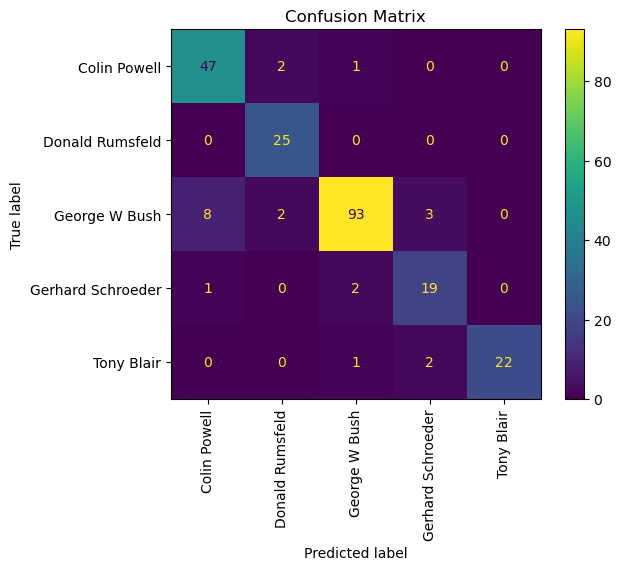


Classification Report:
                   precision    recall  f1-score   support

     Colin Powell       0.84      0.94      0.89        50
  Donald Rumsfeld       0.86      1.00      0.93        25
    George W Bush       0.96      0.88      0.92       106
Gerhard Schroeder       0.79      0.86      0.83        22
       Tony Blair       1.00      0.88      0.94        25

         accuracy                           0.90       228
        macro avg       0.89      0.91      0.90       228
     weighted avg       0.91      0.90      0.90       228



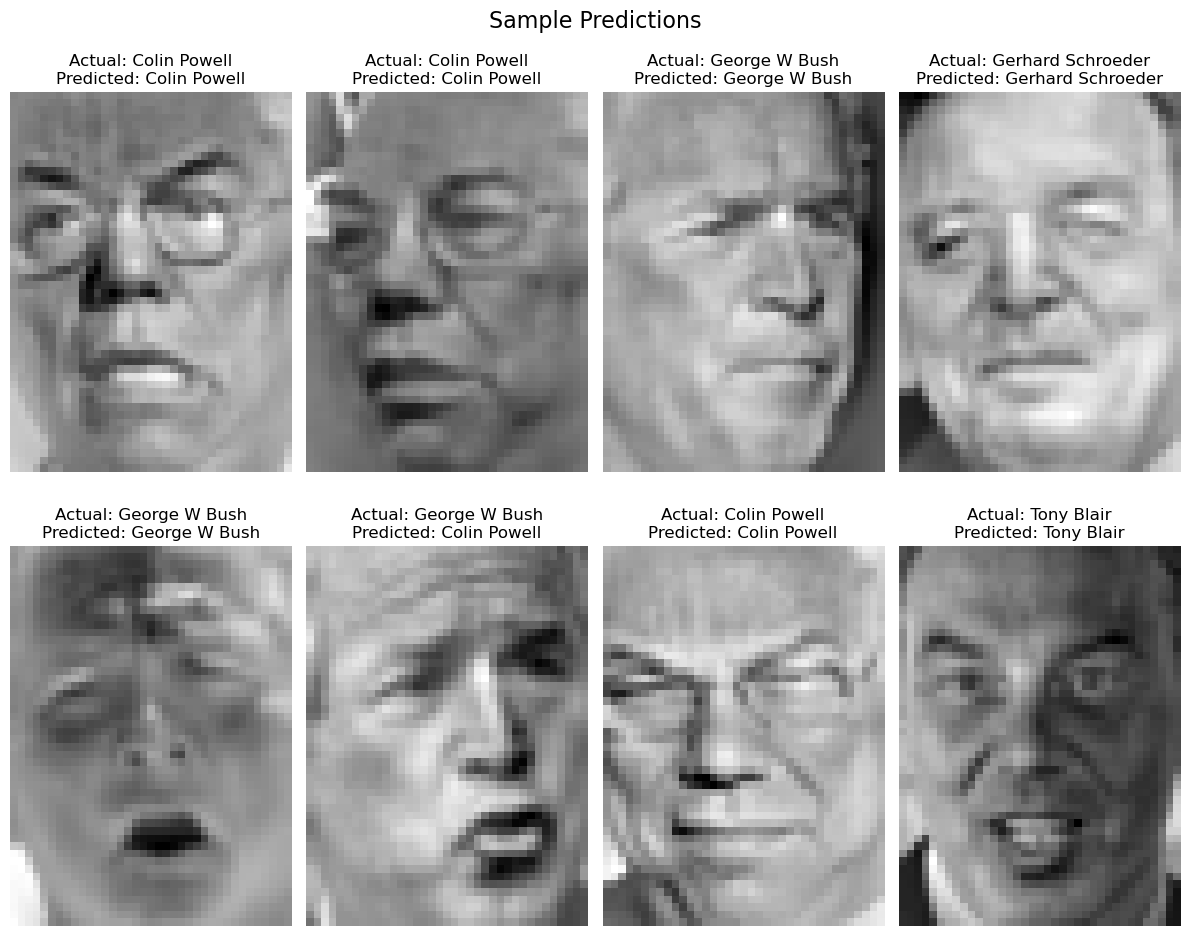

In [8]:
# Import necessary libraries for model training
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

# Initialize an SVM model
print("\nTraining Support Vector Machine (SVM) model...")
svm = SVC(kernel="rbf", class_weight="balanced", random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": [0.001, 0.01, 0.1, 1]
}
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3, scoring="accuracy", verbose=1)
grid_search.fit(X_train_pca, y_train)

# Best model from GridSearch
best_svm = grid_search.best_estimator_

# Evaluate the model
print("\nEvaluating the SVM model...")
y_pred = best_svm.predict(X_test_pca)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap="viridis", xticks_rotation=90)
plt.title("Confusion Matrix")
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Visualize predictions
def visualize_predictions(X_test, y_test, y_pred, target_names, n_samples=8):
    plt.figure(figsize=(12, 10))
    for i in range(n_samples):
        plt.subplot(2, n_samples // 2, i + 1)
        plt.imshow(X_test[i].reshape(h, w), cmap="gray")
        plt.title(f"Actual: {target_names[y_test[i]]}\nPredicted: {target_names[y_pred[i]]}")
        plt.axis("off")
    plt.suptitle("Sample Predictions", fontsize=16)
    plt.tight_layout()
    plt.show()

# Display sample predictions
visualize_predictions(X_test, y_test, y_pred, target_names)


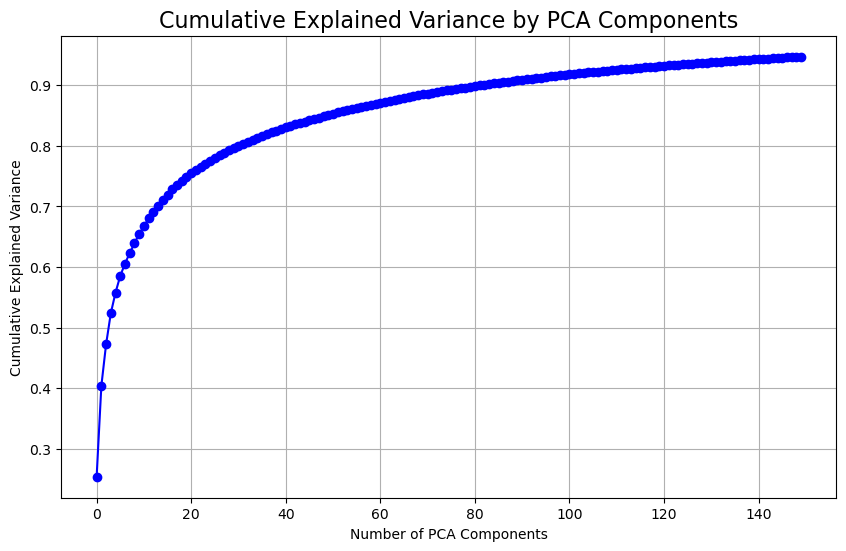

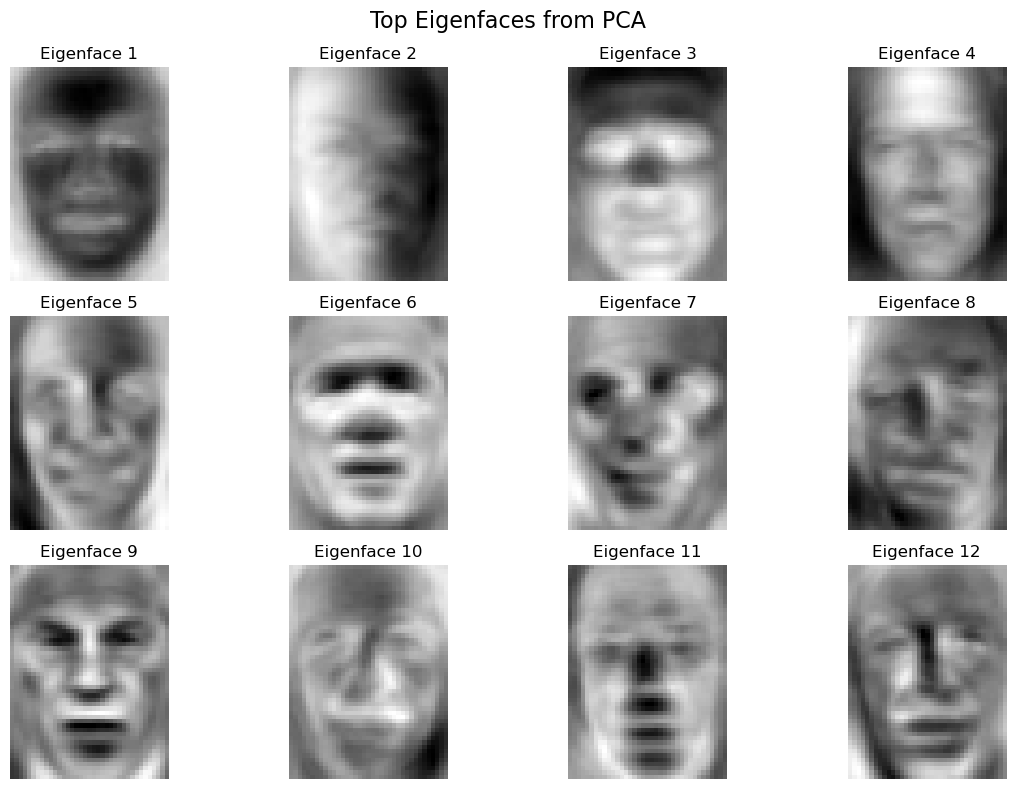

In [9]:
# Visualize explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker="o", color="b")
plt.title("Cumulative Explained Variance by PCA Components", fontsize=16)
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

# Display the top eigenfaces (principal components)
eigenfaces = pca.components_.reshape((150, h, w))

plt.figure(figsize=(12, 8))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(eigenfaces[i], cmap="gray")
    plt.title(f"Eigenface {i + 1}")
    plt.axis("off")
plt.suptitle("Top Eigenfaces from PCA", fontsize=16)
plt.tight_layout()
plt.show()


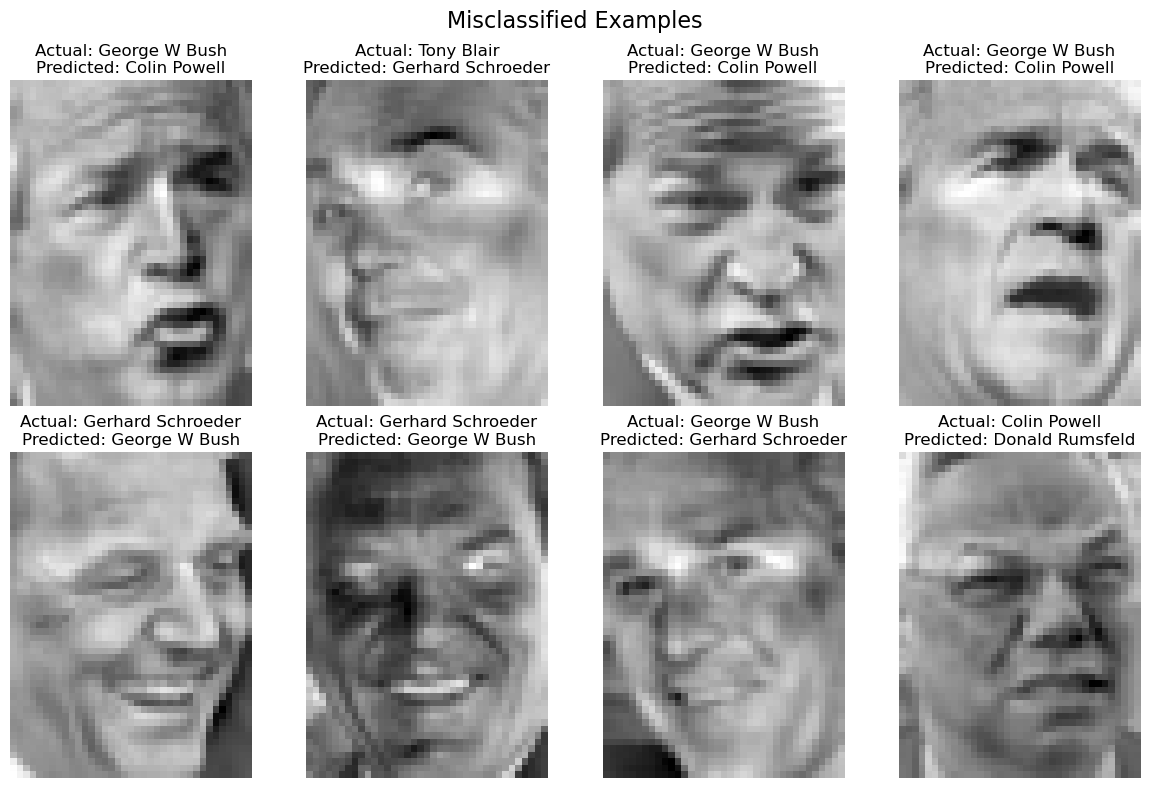

In [10]:
# Find misclassified samples
misclassified_idx = np.where(y_test != y_pred)[0]

# Display a few misclassified examples
def visualize_misclassifications(X_test, y_test, y_pred, target_names, misclassified_idx, n_samples=8):
    plt.figure(figsize=(12, 8))
    for i, idx in enumerate(misclassified_idx[:n_samples]):
        plt.subplot(2, n_samples // 2, i + 1)
        plt.imshow(X_test[idx].reshape(h, w), cmap="gray")
        plt.title(f"Actual: {target_names[y_test[idx]]}\nPredicted: {target_names[y_pred[idx]]}")
        plt.axis("off")
    plt.suptitle("Misclassified Examples", fontsize=16)
    plt.tight_layout()
    plt.show()

visualize_misclassifications(X_test, y_test, y_pred, target_names, misclassified_idx)
